## Introduction

In [1]:
cd '/Users/EazyIOS/Desktop/python/ud120-projects/final_project'

/Users/EazyIOS/Desktop/python/ud120-projects/final_project


In [2]:
# Bunch of import statements
import sys
import pickle
sys.path.append("../tools/")

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

## Data Exploration

In [4]:
import pandas as pd

df = pd.DataFrame.from_records(list(data_dict.values()))
employees = pd.Series(list(data_dict.keys()))

# set the index of df to be the employees series:
df.set_index(employees, inplace=True)

df.head()

del df['email_address']

# Converting data types to float
df=df.astype(float)

We can also see the total amount of features by looking at the shape of the dataframe.

In [5]:
df.shape

(146, 20)

The dataset has 20 features (21 originally as email adress was removed), covering 146 persons.

In [6]:
# Number of persons in dataset
print len(data_dict)

# Number of non-POIs and POIs in dataset
df["poi"].value_counts()

146


0.0    128
1.0     18
Name: poi, dtype: int64

In [7]:
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000.0,NaN,NaN,NaN,NaN,94299.0,29.0,38.0,1.0,NaN,NaN,1740.0,0.0,585062.0,NaN,365788.0,702.0,807.0,1061827.0,585062.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,0.0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
ELLIOTT STEVEN,350000.0,NaN,-400729.0,NaN,4890344.0,78552.0,NaN,NaN,NaN,NaN,NaN,12961.0,0.0,1788391.0,NaN,170941.0,NaN,NaN,211725.0,6678735.0
CORDES WILLIAM R,NaN,NaN,NaN,NaN,651850.0,NaN,12.0,10.0,0.0,NaN,NaN,NaN,0.0,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0
HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,5538001.0,34039.0,32.0,32.0,21.0,NaN,1617011.0,11350.0,1.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
MORDAUNT KRISTINA M,325000.0,NaN,NaN,NaN,NaN,35018.0,NaN,NaN,NaN,NaN,NaN,1411.0,0.0,208510.0,NaN,267093.0,NaN,NaN,628522.0,208510.0
MEYER ROCKFORD G,NaN,1848227.0,NaN,NaN,493489.0,NaN,28.0,0.0,0.0,NaN,NaN,NaN,0.0,462384.0,NaN,NaN,22.0,232.0,1848227.0,955873.0
MCMAHON JEFFREY,2600000.0,NaN,NaN,NaN,1104054.0,137108.0,48.0,58.0,26.0,NaN,694862.0,297353.0,0.0,558801.0,NaN,370448.0,2228.0,2355.0,4099771.0,1662855.0
HORTON STANLEY C,NaN,3131860.0,NaN,NaN,5210569.0,NaN,1073.0,44.0,15.0,NaN,NaN,NaN,0.0,2046079.0,NaN,NaN,1074.0,2350.0,3131860.0,7256648.0
PIPER GREGORY F,400000.0,1130036.0,-33333.0,NaN,880290.0,43057.0,222.0,61.0,48.0,NaN,NaN,778.0,0.0,409554.0,-409554.0,197091.0,742.0,1238.0,1737629.0,880290.0


There are a total of 146 persons in the dataset, of which 18 are POIs.  All of the features include some NaN's:

In [8]:
df.isnull().sum(axis=0)

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [9]:
# Convert any NaNs to 0
df = df.fillna(0)

In [10]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,1.149658e+06,6.646839e+05,5.854318e+05,0.123288,1.749257e+06,2.051637e+04,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,9.649342e+06,4.046072e+06,3.682345e+06,0.329899,1.089995e+07,1.439661e+06,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.115000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,0.000000e+00,0.000000e+00,9.595000e+02,0.000000,3.605280e+05,0.000000e+00,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,0.000000e+00,3.750648e+05,1.506065e+05,0.000000,8.145280e+05,0.000000e+00,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.000000,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


Let's plot salary against bonus to see if there are any clear outliers.

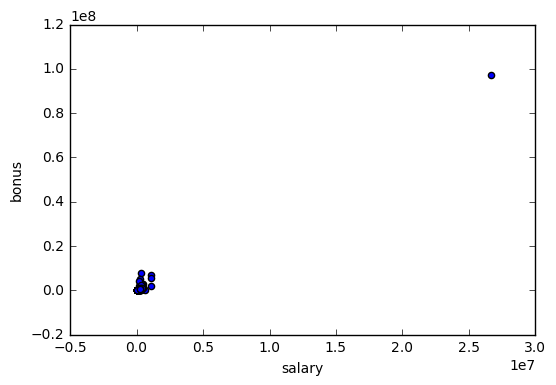

In [11]:
df.plot('salary', 'bonus', kind="scatter")

As can be seen, there is a clear outlier.

In [12]:
df["salary"][df["salary"] > 5000000]

TOTAL    26704229.0
Name: salary, dtype: float64

This key in the dataset apparantely sums up the data from all persons. Since we are looking at individuals persons this outlier should be removed. We will do this in the next section.

In [13]:
df.loc["TOTAL"]

bonus                         97343619.0
deferral_payments             32083396.0
deferred_income              -27992891.0
director_fees                  1398517.0
exercised_stock_options      311764000.0
expenses                       5235198.0
from_messages                        0.0
from_poi_to_this_person              0.0
from_this_person_to_poi              0.0
loan_advances                 83925000.0
long_term_incentive           48521928.0
other                         42667589.0
poi                                  0.0
restricted_stock             130322299.0
restricted_stock_deferred     -7576788.0
salary                        26704229.0
shared_receipt_with_poi              0.0
to_messages                          0.0
total_payments               309886585.0
total_stock_value            434509511.0
Name: TOTAL, dtype: float64

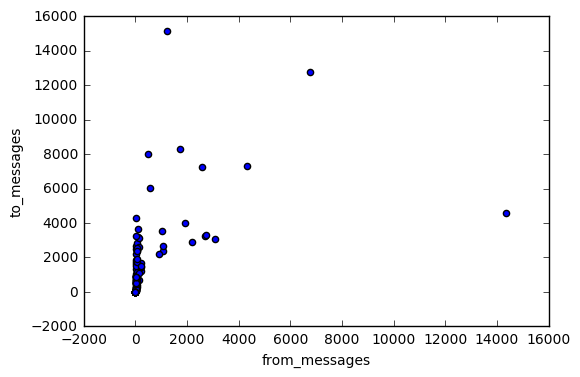

In [14]:
df.plot('from_messages', 'to_messages', kind="scatter")

In [15]:
df["from_messages"][df["from_messages"] > 10000]

KAMINSKI WINCENTY J    14368.0
Name: from_messages, dtype: float64

In [16]:
df.loc["KAMINSKI WINCENTY J"]

bonus                         400000.0
deferral_payments                  0.0
deferred_income                    0.0
director_fees                      0.0
exercised_stock_options       850010.0
expenses                       83585.0
from_messages                  14368.0
from_poi_to_this_person           41.0
from_this_person_to_poi          171.0
loan_advances                      0.0
long_term_incentive           323466.0
other                           4669.0
poi                                0.0
restricted_stock              126027.0
restricted_stock_deferred          0.0
salary                        275101.0
shared_receipt_with_poi          583.0
to_messages                     4607.0
total_payments               1086821.0
total_stock_value             976037.0
Name: KAMINSKI WINCENTY J, dtype: float64

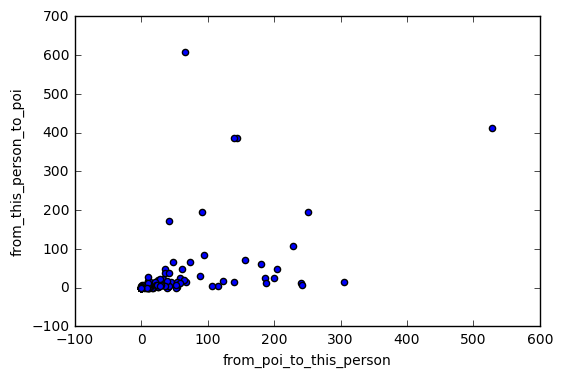

In [17]:
df.plot('from_poi_to_this_person', 'from_this_person_to_poi', kind="scatter")

In [18]:
df["from_poi_to_this_person"][df["from_poi_to_this_person"] > 500]

LAVORATO JOHN J    528.0
Name: from_poi_to_this_person, dtype: float64

In [19]:
df.loc["LAVORATO JOHN J"]

bonus                         8000000.0
deferral_payments                   0.0
deferred_income                     0.0
director_fees                       0.0
exercised_stock_options       4158995.0
expenses                        49537.0
from_messages                    2585.0
from_poi_to_this_person           528.0
from_this_person_to_poi           411.0
loan_advances                       0.0
long_term_incentive           2035380.0
other                            1552.0
poi                                 0.0
restricted_stock              1008149.0
restricted_stock_deferred           0.0
salary                         339288.0
shared_receipt_with_poi          3962.0
to_messages                      7259.0
total_payments               10425757.0
total_stock_value             5167144.0
Name: LAVORATO JOHN J, dtype: float64

Nothing seems to be neccessarily wrong with the last two example of "outliers". We will not proceed to remove these, and will continue on with the rest of the dataset.

## Task 1: Select what features you'll use.

In [20]:
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = [
'poi',
'salary',
'to_messages',
'deferral_payments',
'total_payments',
'exercised_stock_options',
'bonus',
'restricted_stock',
'shared_receipt_with_poi',
'restricted_stock_deferred',
'total_stock_value',
'expenses',
'loan_advances',
'from_messages',
'from_this_person_to_poi',
'director_fees',
'deferred_income',
'long_term_incentive',
'from_poi_to_this_person'
]


These are the original features of the dataset. After removing the outliers in the next section I will proceed to add some other features. Afterwards SelectKBest will be used before building my models to select the K best features.

## Task 2: Remove outliers

As discussed in the data exploration section I have found a wrong value in the dataset ("TOTAL"), which was a sum of all other persons in the dataset. Since we are only interested in individual persons, this needs to be removed before building a model.

In [21]:
df = df.drop(['TOTAL'])

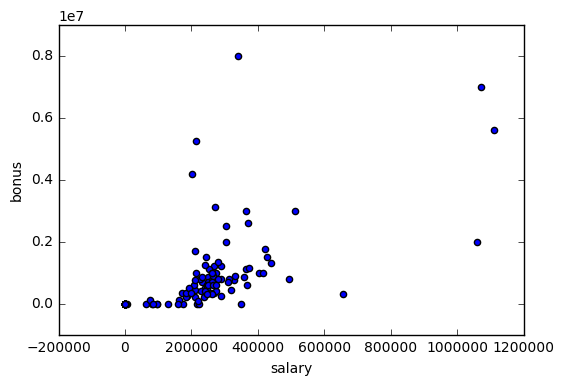

In [22]:
df.plot('salary', 'bonus', kind="scatter")

Further investigation led to the identification of two further values which should be removed. 

In [23]:
# Remove travel agency since this is not a person
df.loc('THE TRAVEL AGENCY IN THE PARK')
df.drop(['THE TRAVEL AGENCY IN THE PARK'])

# Manually going through the dataset showed that there was one person with no values
df.loc('LOCKHART EUGENE E')
# Therefore, let's remove this row
df.drop(['LOCKHART EUGENE E'])

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000.0,0.0,0.0,0.0,0.0,94299.0,29.0,38.0,1.0,0.0,0.0,1740.0,0.0,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,0.0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
ELLIOTT STEVEN,350000.0,0.0,-400729.0,0.0,4890344.0,78552.0,0.0,0.0,0.0,0.0,0.0,12961.0,0.0,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
CORDES WILLIAM R,0.0,0.0,0.0,0.0,651850.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
HANNON KEVIN P,1500000.0,0.0,-3117011.0,0.0,5538001.0,34039.0,32.0,32.0,21.0,0.0,1617011.0,11350.0,1.0,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0
MORDAUNT KRISTINA M,325000.0,0.0,0.0,0.0,0.0,35018.0,0.0,0.0,0.0,0.0,0.0,1411.0,0.0,208510.0,0.0,267093.0,0.0,0.0,628522.0,208510.0
MEYER ROCKFORD G,0.0,1848227.0,0.0,0.0,493489.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,462384.0,0.0,0.0,22.0,232.0,1848227.0,955873.0
MCMAHON JEFFREY,2600000.0,0.0,0.0,0.0,1104054.0,137108.0,48.0,58.0,26.0,0.0,694862.0,297353.0,0.0,558801.0,0.0,370448.0,2228.0,2355.0,4099771.0,1662855.0
HORTON STANLEY C,0.0,3131860.0,0.0,0.0,5210569.0,0.0,1073.0,44.0,15.0,0.0,0.0,0.0,0.0,2046079.0,0.0,0.0,1074.0,2350.0,3131860.0,7256648.0
PIPER GREGORY F,400000.0,1130036.0,-33333.0,0.0,880290.0,43057.0,222.0,61.0,48.0,0.0,0.0,778.0,0.0,409554.0,-409554.0,197091.0,742.0,1238.0,1737629.0,880290.0


## Task 3: Create new feature(s)

Now that I have removed outliers, it is time to create several new features that might be of use in the classification algorithms that I will explore later on.

1. Total value received: I would like to investigate whether the total amount of compensation has some predicting powers
2. Salary to bonus: If a person receives a very large amount of bonus compared to their salary this might be suspicious.
3. From to POI: Percentage of emails received which were from a POI
4. To from POI: Percentage of emails sent which were sent to a POI
5. Restricted stock ratio: Percentage of stocks that is restricted. Restricted means that the person first gets access to the stocks once certain condition/performance goals are met.


In [24]:
df["benefits"] = df["salary"] + df["bonus"] + df["total_stock_value"]
df["salary_to_bonus"] = df["salary"] / df["bonus"]
df["from_poi_percentage"] = df["from_poi_to_this_person"] / df["from_messages"]
df["to_poi_percentage"] = df["from_this_person_to_poi"] / df["to_messages"]
df["restricted_stock_ratio"] = df["restricted_stock"] / df["total_stock_value"]

# Some values are set to inf due to division by zero. Set these to nan
df = df.replace([np.inf, -np.inf], np.nan)
df.fillna(0, inplace = True)

Let's have a quick look if we can see if a large number of POIs has a restricted stock ratio of higher than 0.5.

In [25]:
len(df[(df['restricted_stock_ratio'] > 0.5) & (df['poi'] == 1.0)])

8

In [26]:
len(df[(df['restricted_stock_ratio'] > 0.5) & (df['poi'] == 0.0)])

35

As can be seen, 8 out of 18 POIs has a relatively large restricted stock ratio. This feature should thus likely add some value to the feature set.

After included the new features, there now is a total of 25 features.

In [27]:
df.shape

(145, 25)

In [28]:
# column names will be your new features
# create a list of column names:
new_features_list = df.columns.values
#features_list = df.columns.values

# Move poi to front of array
itemindex = np.where(new_features_list=="poi")
new_features_list = np.delete(new_features_list, itemindex)

new_features_list = np.insert(new_features_list, 0, "poi")

# create a dictionary from the dataframe
df_dict = df.to_dict('index')

In [29]:
# Get the new dict created through Pandas
my_dataset = df_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, new_features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Future selection

Further future selection will be applied by SelectKBest when building classification models.

## Task 4 & 5: Trying and tune different classifier

I will now proceed to build several classifier, and will tune these with help of GridSearch.

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
select = SelectKBest()
pca = PCA()

# Let's create a function to setup and test multiple different models
def createModel(steps, params):

    sss = StratifiedShuffleSplit(
        n_splits=50,
        test_size=0.5
    )

    gs = GridSearchCV(
        Pipeline(steps),
        param_grid = params,
        scoring = 'f1_weighted',
        cv = sss
    )

    gs.fit(features,labels)

    # Pass the best algorithm as clf
    clf = gs.best_estimator_
    
    # Print Results
    print "Classification report:"
    print " "
    test_classifier(clf, my_dataset, new_features_list)
    
    return clf,gs

def printChosenFeatures(gs):
    feature_scores = gs.best_estimator_.named_steps['feature_selection'].scores_
    features_selected=[features_list[i+1]for i in gs.best_estimator_.named_steps['feature_selection'].get_support(indices=True)]
    features_scores_selected=[feature_scores[i]for i in gs.best_estimator_.named_steps['feature_selection'].get_support(indices=True)]
    print ' '
    print 'Selected Features', features_selected
    print 'Feature Scores', features_scores_selected
    
def printVarianceRatio(gs):
    print gs.best_estimator_.named_steps['pca'].explained_variance_ratio_

In [31]:
#GaussianNB
steps = [('scaling', scaler),
    ('pca', pca),
    ('feature_selection', select),
    ('classifier',GaussianNB())]

params = {
    'pca__n_components': [8,9,10,11,12,13,14],
    'feature_selection__k': range(3,7)
}

clf1,gs1 =  createModel(steps, params)

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report:
 
Pipeline(steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('feature_selection', SelectKBest(k=3, score_func=<function f_classif at 0x10c5a97d0>)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.84773	Precision: 0.41224	Recall: 0.33350	F1: 0.36871	F2: 0.34675
	Total predictions: 15000	True positives:  667	False positives:  951	False negatives: 1333	True negatives: 12049



In [32]:
printChosenFeatures(gs1)

 
Selected Features ['salary', 'to_messages', 'expenses']
Feature Scores [20.720304902459414, 4.3906365749886334, 9.1007368413311482]


In [33]:
printVarianceRatio(gs1)

[ 0.31276628  0.14256918  0.0989484   0.07776994  0.07109078  0.0445254
  0.04331579  0.03624938  0.03188378  0.02706872  0.02364477  0.0205856
  0.01558009  0.01349587]


In [34]:
#KNearestNeighbors
steps = [('scaling', scaler),
    ('feature_selection', select),
    ('classifier',KNeighborsClassifier())]

params = {
    'classifier__n_neighbors': [2,3,4,5,6],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1,2],
    'classifier__leaf_size': [2,3,4,5],
    'feature_selection__k': range(3,7)
}
     
clf2,gs2 =  createModel(steps, params)

//anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [9] are constant.
  UserWarning)


Classification report:
 
Pipeline(steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=3, score_func=<function f_classif at 0x10c5a97d0>)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])
	Accuracy: 0.86127	Precision: 0.46049	Recall: 0.23600	F1: 0.31207	F2: 0.26150
	Total predictions: 15000	True positives:  472	False positives:  553	False negatives: 1528	True negatives: 12447



In [35]:
#SVM
steps = [('scaling', StandardScaler()),
    ('pca', pca),
    ('feature_selection', select),
    ('classifier',SVC())]

params = {
    'pca__n_components': [8,9,10,11,12,13,14],
    'feature_selection__k': range(3,7),
    'classifier__kernel': ('linear', 'rbf'),
    'classifier__C': [1, 10, 100]
}

clf3,gs3 =  createModel(steps, params)

Classification report:
 
Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x10c5a97d0>)), ('cla...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.86200	Precision: 0.44822	Recall: 0.15150	F1: 0.22646	F2: 0.17462
	Total predictions: 15000	True positives:  303	False positives:  373	False negatives: 1697	True negatives: 12627



In [36]:
# Decision tree classifier

# Euclidian distance is not used in decision trees,
# so scaling not necessary
steps = [
    ('pca', pca),
    ('feature_selection', select),
    ('classifier',DecisionTreeClassifier(criterion = 'gini'))]

params = {
    'classifier__min_samples_split': [2,3,4,5],
    'classifier__min_samples_leaf': [1,2,3,4],
    'pca__n_components': [8,9,10,11,12],
    'feature_selection__k': range(3,7)
}

clf4,gs4 = createModel(steps,params)

Classification report:
 
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('feature_selection', SelectKBest(k=3, score_func=<function f_classif at 0x10c5a97d0>)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', ma...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
	Accuracy: 0.82220	Precision: 0.29602	Recall: 0.24200	F1: 0.26630	F2: 0.25117
	Total predictions: 15000	True positives:  484	False positives: 1151	False negatives: 1516	True negatives: 11849



In [37]:
# Random Forest

# Scaling not used in random forests
steps = [
    ('pca', pca),
    ('feature_selection', select),
    ('classifier',RandomForestClassifier(criterion = 'gini'))]

params = {
    'classifier__n_estimators': [6,8,10,12,14],
    'classifier__min_samples_split': [2,3,4],
    'classifier__min_samples_leaf': [2,3,4],
    'pca__n_components': [8,9,10,11,12],
    'feature_selection__k': range(3,7)
}

clf5,gs5 = createModel(steps,params)

Classification report:
 
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x10c5a97d0>)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, cri...imators=14, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
	Accuracy: 0.86227	Precision: 0.44876	Recall: 0.14450	F1: 0.21861	F2: 0.16717
	Total predictions: 15000	True positives:  289	False positives:  355	False negatives: 1711	True negatives: 12645



In [38]:
# AdaBoost
steps = [('scaling', scaler),
    ('pca', pca),
    ('feature_selection', select),
    ('classifier',AdaBoostClassifier())]

params = {
    'classifier__n_estimators': [5,10,15,20,25,30],
    'classifier__learning_rate': [0.5,1.0,1.5,2.0],
    'pca__n_components': [8,9,10,11,12],
    'feature_selection__k': range(3,7)
}

clf6,gs6 = createModel(steps,params)

Classification report:
 
Pipeline(steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('feature_selection', SelectKBest(k=5, score_func=<function f_classif at 0x10c5a97d0>)), ('classifier', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=None))])
	Accuracy: 0.80220	Precision: 0.17086	Recall: 0.12550	F1: 0.14471	F2: 0.13254
	Total predictions: 15000	True positives:  251	False positives: 1218	False negatives: 1749	True negatives: 11782



## Task 5b: Running best performing model without new features

As a final step before wrapping up, it will be intersting to ompare the scores of the final model with and without including new features.

In [39]:
data_exluding_new = featureFormat(my_dataset, features_list, sort_keys = True)
labels_exluding_new, features_exluding_new = targetFeatureSplit(data_exluding_new)

In [40]:
#GaussianNB
steps = [('scaling', scaler),
    ('pca', pca),
    ('feature_selection', select),
    ('classifier',GaussianNB())]

params = {
    'pca__n_components': [8,9,10,11,12,13,14],
    'feature_selection__k': range(3,7)
}

sss = StratifiedShuffleSplit(
      n_splits=50,
      test_size=0.5
)

gs = GridSearchCV(
    Pipeline(steps),
    param_grid = params,
    scoring = 'f1_weighted',
    cv = sss
    )

gs.fit(features_exluding_new, labels)

# Pass the best algorithm as clf
clf_exluding_new = gs.best_estimator_
    
# Print Results
print "Classification report:"
print " "
test_classifier(clf_exluding_new, my_dataset, features_list)

Classification report:
 
Pipeline(steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('feature_selection', SelectKBest(k=3, score_func=<function f_classif at 0x10c5a97d0>)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.84353	Precision: 0.39580	Recall: 0.32950	F1: 0.35962	F2: 0.34092
	Total predictions: 15000	True positives:  659	False positives: 1006	False negatives: 1341	True negatives: 11994



In [42]:
printChosenFeatures(gs)

 
Selected Features ['salary', 'to_messages', 'restricted_stock']
Feature Scores [17.490066014552585, 8.174475549046333, 3.6312681929468882]


In [43]:
printVarianceRatio(gs)

[ 0.35579297  0.15058836  0.11393129  0.09606826  0.07633172  0.04319999
  0.03070132  0.02801385  0.02343099]


The models performs on roughly the same level as the model with the new features. Both models have created components based on "salary" and "to_messages" features, although the model without new features creates only 9 principal components.

## Task 6: Saving classifier, dataset, and feature list

In [44]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf1, my_dataset, new_features_list)

## Answering questions


### 1.Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

The goal of this project is to create a classification model which can be used to identify potential persons of interest (POIs) in the Enron dataset. POI in this study are persons that might have commited fraud. This dataset consists of a variety of financial data, as well as email data, regarding a large number of former Enron employees. The financial data includes variables such as the employees' stock value and salary. The email data on the other hand lists information such as the total amount of emails sent and received in total, as well as to POIs. 

The dataset includes a total of 146 persons, of which 18 are POIs. The remainder (128) are not considered POIs. 
In the original dataset there were 21 deatures, but the email adresss features was removed, and an additional 5 new features has been added, bringing the total to 25. Many of these features include NaN values.

- bonus                         64
- deferral_payments            107
- deferred_income               97
- director_fees                129
- exercised_stock_options       44
- expenses                      51
- from_messages                 60
- from_poi_to_this_person       60
- from_this_person_to_poi       60
- loan_advances                142
- long_term_incentive           80
- other                         53
- poi                            0
- restricted_stock              36
- restricted_stock_deferred    128
- salary                        51
- shared_receipt_with_poi       60
- to_messages                   60
- total_payments                21
- total_stock_value             20

All NaN values were converted to 0's. An alternative would be to convert them to the median of each column, but I feel like converting to zeroes is a bit more conservative since there are so many values missing (medians might not be very representative of the true median?)

The underlying thought here is that persons with higher financial rewards might be more likely to have been a part of the fraud happining at Enron. Regarding the email data, it could be expected that persons that had much contact with other POIs might be more likely to be a POI themselves. Therefore it might be possible to build a classification model with the help of this dataset which can be used to identifiy POIs. 

Regarding outliers, it is important to note that the dataset is relatively small. A total of 146 persons are included, with only 18 of these POIs. Since we also need to spit the data in a test and training set, this gives us a very limited number of POIs left to train on. Therefore we have to be very conservative in removing outliers, as just removing a single observation can potentially remove important information. In the end it was decided to remove a wrong observation in the dataset ("TOTAL"), as this was simply a value summing the values of all other persons in the dataset. Since we are only interersted in single persons, this needed to be removed. Secondly, there was an observation representing a travel agency. Again, since we are interested in indivivuals, also this value was removed. Finally, there was a person with all variables missing ("LOCKHART EUGENE E"). This is useless so therefore this observation was also removed. 

### 2.What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.

The most succesful classification model was build on the Naive Bayes algorithm. Before building the model 5 different features were engineered. As mentioned before these were:

* Total value received: I would like to investigate whether the total amount of compensation has some predicting powers. Persons of interests could very well be rewarded more.
* Salary to bonus: If a person receives a very large amount of bonus compared to their salary this might be suspicious.
* From to POI: Percentage of emails received which were from a POI. POIs are probably likely to communicated with other POIs.
* To from POI: Percentage of emails sent which were sent to a POI. Same reasoning as before.
* Restricted stock ratio: Percentage of stocks that is restricted. Restricted means that the person first gets access to the stocks once certain condition/performance goals are met. Persons with a higher restricted stock ratio (stock first awarded when certain performance goals are met) might be more likely to commit fraud to reach these goals.

The selection process was as follows:

1. A simple standard model was run including all features.
2. A Pipeline was setup to assemble several steps that can be cross-validated together while setting different parameters.
3. As a first step in the pipeline, all featured were scaled using MinMaxScaler such that all features are set between 0-1. This prevents that features with a greater range of numbers are given more weight. 
4. Principal Component Analysis (PCA) was applied to the feature. This is used to reduce the dimensionality of the data by project it to a lower dimensional space. The optimal number of components was found by using GridSearchCV. 
5. After the PCA, feature selection was applied with the use of SelectKBest. This selects the K number of features that performs best according to the ANOVA F-value (f_classif). The optimal number K was found by using GridSearchCV.
6. The pipeline was finally inserted into GridSearchCV to optimize the different parameters of the feature selection, PCA and the different algorithms.

The PCA ran returned the following 10 explained variance ratio scores:

0.31276628  0.14256918  0.0989484   0.07776994  0.07109078  0.0445254
0.04331579  0.03624938  0.03188378  0.02706872  0.02364477  0.0205856
0.01558009  0.01349587
  
The selected features in the chosen model build upon Naive Bayes were the components based on only three features:
'salary','to_messages' and 'expenses'.

These had the following scores:

20.720304902459414, 4.3906365749886334, 9.1007368413311482


### 3.What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?

I have tested every algorithm discussed in the course. These included: K-Nearest Neighbor, Naive Bayes, Decision Tree, SVM, Random Forest, and finally AdaBoost. Most models were relatively succesful. Surprisingly enough the simpler models showed higher F1 (and precision/recall) scores, possible due to the small size of the dataset. The Gaussian Naive Bayes model performed best, with K-Nearest Neighbors coming at a second place.

**F1 scores**
1. Gaussian Naive Bayes: 0.36871 (Precision: 0.41224, Recall: 0.33350)
2. K-Nearest Neighbors: 0.31207
3. SVM: 0.22646
4. Decision Tree: 0.26630
5. Random Forest: 0.21861 
6. AdaBoost: 0.14471

### 4.What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune

For the majority of the algorithms discussed there are a variety of parameters that can be tuned. In this project I used GridSearch to let the computer automatically find the most ideal parameters. While doing this manually it is important to remember the tradeoff between bias and variance. A high bias occurs if the model is relatively simple and underfit the training data. This might means that insights from the training set are missed. A high variance on the other hand relates to to models that represent the training data extremely well, but performs poorly on new data. Both extreme cases are prefereably avoided and a balance should be found.

In this project the parameters of the different discussed algorithms were automatically tuned by the use of GridSearchCV, which exhaustively finds the parameters that optimize a certain score (f1 in this case). A list of parameters was passed to GridSearchCV, with corresponding possible values for each parameter.

### 5.What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis? 

Validation relates to the techniques used in assessing how the results of a machine learning model will generalize to an independent data set. As a simple example you could split your entire dataset into a training and a testing dataset. The machine learning model willl be trained on the training data, while it afterwards can be validated by using it to make predictions on the testing dataset. This guarantees that the model is not tested on data which it was build upon. If one would test the model on the same data as it was tested it would give very high evaluation metrics due to overfitting, but as soon as it would be used on other data is would probably perform poorly.

In relation to validation, it is important to mention the unbalanced dataset. As mention before, there are only 18 persons in the dataset which are POIs. Therefore it is important to use the cross-validation method Stratified Shuffle Split, which makes sure that the ratio of POI and non-POI is the same during training and testing.

### 6.Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

The two most relevant evaluation metrics in this project are Precision and Recall.
Precision relates to the percentage of items labeled as positive which are truly belong to the positive class.
Recall related to the percentage of all the items that are truly positive which are correctly classified as positive.

In relation to my model the values were:

**Precision: 0.41224**. This means that roughly 41% of all persons labeled as a POI by the model were truelly a POI.

**Recall: 0.33350** This means that roughly 33% of all POIs in the dataset were correctly classified as POI by the model.

Important to note is the F1 evaluation metric, which takes into account both precision and recall. In most technical terms it is the harmonic mean of precision and recall. 
For the chosen algorithm the found **F1 score** was: **0.36871**

In more balanced datasets (with the different classes being roughly equally represented in the dataset one might look at accuaracy. But since only a small percentage of the Enron dataset consists of POIs, a model might still have a high accuracy if it predict all non-POIs, but fails to succesfully classify POIs. In this case the accuracy might be more than 80%, even though the model fails to do what we need it to do, that is predicting persons of interset.
